In [98]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [99]:
def get_data(dir):
    data = load_svmlight_file(dir)
    return data[0], data[1]

dir="./australian_scale"

In [195]:
x,y=x,y=get_data(dir)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

x_train=x_train.todense()
x_train=np.column_stack((np.ones(x_train.shape[0]),x_train)) #加多一列偏置
y_train=np.transpose(np.mat(y_train))


x_test=x_test.todense()
x_test=np.column_stack((np.ones(x_test.shape[0]),x_test)) #多一列偏置
y_test=np.transpose(np.mat(y_test))

print(x_train.shape[0])
print(x_test.shape[0])

552
138


In [196]:
def hinge_loss(w,x,y):
    l=1-np.multiply(y,x*w) #把小于的化为false
    l2=(l>=0)   #把大于等于0的化为true
    r=np.multiply(l,l2)#筛选
    #print(r)
    return np.mean(r)  

def accuracy(w,x,y,threshold): #计算精确率
    y_=x*w
    result=np.multiply(y,y_)
    result=(result>=threshold)
    return np.mean(result)

def loss(w,x,y):  #大于等于0的化为true，小于0的化为false
    l=1-np.multiply(y,x*w)
    l2=(l>=0)
    return l2

def gradient(w,x,y,C): 
    tmp=np.multiply(y,loss(w,x,y)) #筛选
    g=w-C*np.sum(np.multiply(x_train,tmp),0).T #梯度运算
    return g

origin_w=np.random.standard_normal([x.shape[1]+1,1]) #得到初始的w，方便后面控制变量做测试

In [209]:
eta=0.0005
C=1
epoch=600
#w=np.zeros([x.shape[1]+1,1])

w=origin_w
#print(w)
loss_train=[]
loss_test=[]

for i in range(epoch):
    g=gradient(w,x_train,y_train,C) #计算梯度
    w=w-eta*g  #梯度下降
    #print(w)
    loss_train.append(hinge_loss(w,x_train,y_train)) #记录，方便下面画图
    loss_test.append(hinge_loss(w,x_test,y_test))

print(accuracy(w,x_test,y_test,0))
print(accuracy(w,x_train,y_train,0))

0.840579710145
0.858695652174


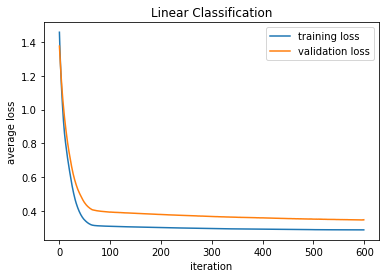

In [210]:
iteration=list(range(epoch))

plt.figure()
l1,=plt.plot(iteration,loss_train)
#plt.figure()
l2,=plt.plot(iteration,loss_test)
plt.title("Linear Classification")
plt.legend([l1,l2,],["training loss","validation loss"])
plt.xlabel("iteration")
plt.ylabel("average loss")

plt.show()